<a href="https://colab.research.google.com/github/Geon27/3-2-googlecolab/blob/main/%EB%A7%8C%EB%8A%A5%EC%85%8B%ED%8C%85_R_SPSS_Python%EB%B9%84%EA%B5%90_2022_ver3_R%EB%A7%8C_ipynb%EC%9D%98_0328.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글폰트 사용을 위한 셋팅

In [ ]:
# http://corazzon.github.io/matplotlib_font_setting
# 한글폰트 불러오기: 런타임을 다시 시작한 후 적용되기 때문에 실행 후
# 런타임 다시 시작 후 다시 한번 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic') 
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


Text(0.5, 0, '시간(분)')

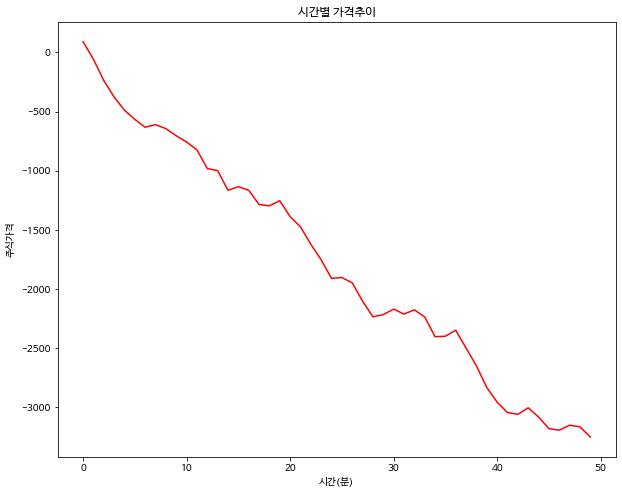

In [ ]:
# 한글그래프 되는지 확인
# 데이터 준비
import numpy as np

data = np.random.randint(-200, 100, 50).cumsum()
data
# 한글을 넣어놓고 그러보면 깨진다
plt.figure(figsize=(10,8)); plt.plot(range(50), data, 'r'); plt.title('시간별 가격추이')
plt.ylabel('주식가격'); plt.xlabel('시간(분)')

## 기본 시스템 셋팅

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

# 아래 출력되는 URL에 접속하여 이용 동의 후 생성되는 인증코드를 복사해서 붙여넣기

Mounted at /content/drive


In [ ]:
# 폴더설정, 같은 런타임에서 두번실행할때 에러 발생하지만 문제는 아님
import os, sys
nb_path = '/content/notebooks'
#create a symbolic link for pointing to /content/mnt/My Drive/Colab Notebooks
os.symlink('/content/mnt/My Drive/Colab_Notebooks', nb_path)
sys.path.insert(0, nb_path) 

In [ ]:
# 작업할 경로를 google drive가 있는 위치로 변경
os.chdir('/content/drive/My Drive/') 
os.getcwd()

'/content/drive/My Drive'

In [ ]:
# 파이썬 라이브러리 경로지정
print(sys.path)
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/package_collection')

['/content/notebooks', '', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


## R추가 사용을 위한 셋팅

In [ ]:
# Load in the r magic
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 설치되어 있는 패키지 확인 및 라이브러리 경로 설정
%%R
.libPaths("/content/drive/MyDrive/Colab_Notebooks/r-lib")

In [ ]:
# 3.패키지 자동설치 자동로드1
%%R
if (!require(pacman)) {install.packages("pacman")
   library(pacman)}
pacman::p_load("corrplot", "stargazer", "plotly", "openxlsx","ggplot2", #  "lazyeval"
          "readxl","dplyr","htmltools", "sjmisc","lawstat",
          "lawstat","Hmisc","gmodels") # "webr","moonBook","gmodels"

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘gtools’, ‘gdata’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/gtools_3.9.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 240402 bytes (234 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

### 데이터 로드

In [ ]:
%%R
### 데이터 로드
# if (!require(readxl)) {install.packages("readxl")
#   library(readxl)}
# url <- "https://github.com/HakJun-Song/class/blob/master/incheon0427.xlsx?raw=true"
# destfile <- "incheon0427.xlsx"
# curl::curl_download(url, destfile)
# incheon0427 <- read_excel(destfile)

incheon0427 <- read.xlsx("https://github.com/HakJun-Song/class/blob/master/incheon0427.xlsx?raw=true/incheon0427.xlsx")

### 기술통계 및 그래픽

In [ ]:
%%R
### 기술통계
target_vars = subset(incheon0427,select=c(q10,q11,q12))
summary(target_vars)

      q10             q11             q12       
 Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:3.000   1st Qu.:3.000   1st Qu.:3.000  
 Median :4.000   Median :4.000   Median :4.000  
 Mean   :3.599   Mean   :3.394   Mean   :3.538  
 3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:4.000  
 Max.   :5.000   Max.   :5.000   Max.   :5.000  


In [ ]:
%%R
### 빈도분석
target_vars_cate <- subset(incheon0427,select=c(q1,q3,q84))
frq(target_vars_cate, out = "v")

R[write to console]: Package `sjPlot` needs to be loaded to print HTML tables.



q1 <numeric> 
# total N=563 valid N=563 mean=1.50 sd=0.50

Value |   N | Raw % | Valid % | Cum. %
--------------------------------------
    1 | 280 | 49.73 |   49.73 |  49.73
    2 | 283 | 50.27 |   50.27 | 100.00
 <NA> |   0 |  0.00 |    <NA> |   <NA>

q3 <numeric> 
# total N=563 valid N=563 mean=2.64 sd=1.26

Value |   N | Raw % | Valid % | Cum. %
--------------------------------------
    1 | 135 | 23.98 |   23.98 |  23.98
    2 | 134 | 23.80 |   23.80 |  47.78
    3 | 135 | 23.98 |   23.98 |  71.76
    4 | 116 | 20.60 |   20.60 |  92.36
    5 |  43 |  7.64 |    7.64 | 100.00
 <NA> |   0 |  0.00 |    <NA> |   <NA>

q84 <numeric> 
# total N=563 valid N=563 mean=2.51 sd=0.89

Value |   N | Raw % | Valid % | Cum. %
--------------------------------------
    1 | 112 | 19.89 |   19.89 |  19.89
    2 |  91 | 16.16 |   16.16 |  36.06
    3 | 320 | 56.84 |   56.84 |  92.90
    4 |  40 |  7.10 |    7.10 | 100.00
 <NA> |   0 |  0.00 |    <NA> |   <NA>


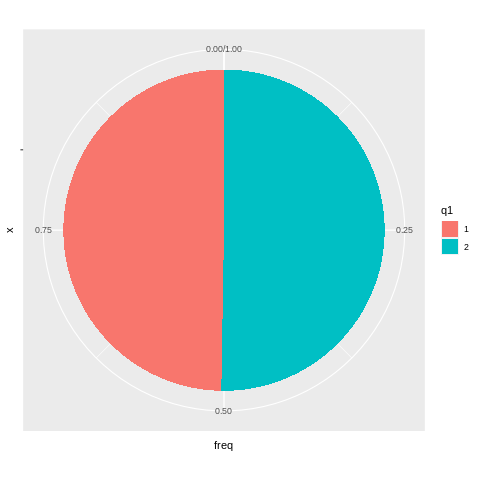

In [ ]:
%%R
### 빈도분석_그래프
incheon0427$q1=as.factor(incheon0427$q1)
cnt <- incheon0427 %>% group_by(q1) %>% summarise(n=n()) %>% mutate(freq = n/sum(n))
cnt  # 도수 값
ggplot(cnt, aes(x="", y=freq, fill=q1)) +
  #facet_grid(facets=.~q1) +
  geom_bar(stat="identity", width=1) +
  coord_polar(theta="y")

### 독립표본 t-test

In [ ]:
%%R
### t-test
# if (!require(lawstat)) {install.packages("lawstat")
#   library(lawstat)}
print(levene.test(incheon0427$q10, incheon0427$q1, 
            location = "mean", correction.method = "zero.correction"))
print(t.test(incheon0427$q10 ~ incheon0427$q1, var.equal=T))
print(t.test(incheon0427$q10 ~ incheon0427$q1, var.equal=F))


	Classical Levene's test based on the absolute deviations from the mean
	( zero.correction not applied because the location is not set to
	median )

data:  incheon0427$q10
Test Statistic = 5.4084, p-value = 0.0204


	Two Sample t-test

data:  incheon0427$q10 by incheon0427$q1
t = -0.58538, df = 561, p-value = 0.5585
alternative hypothesis: true difference in means between group 1 and group 2 is not equal to 0
95 percent confidence interval:
 -0.17336001  0.09375375
sample estimates:
mean in group 1 mean in group 2 
       3.578571        3.618375 


	Welch Two Sample t-test

data:  incheon0427$q10 by incheon0427$q1
t = -0.58499, df = 550.96, p-value = 0.5588
alternative hypothesis: true difference in means between group 1 and group 2 is not equal to 0
95 percent confidence interval:
 -0.17345399  0.09384773
sample estimates:
mean in group 1 mean in group 2 
       3.578571        3.618375 



### One-way ANOVA

In [ ]:
%%R
print(tapply(incheon0427$q10,incheon0427$q3,mean))
tapply(incheon0427$q10,incheon0427$q3,sd)

       1        2        3        4        5 
3.466667 3.574627 3.577778 3.767241 3.697674 
        1         2         3         4         5 
0.9125984 0.8529195 0.7771616 0.6640817 0.6738264 


In [ ]:
%%R
# 등분산 확인하는 방법
bartlett.test(q10 ~ q3, data=incheon0427) # q3: 연령


	Bartlett test of homogeneity of variances

data:  q10 by q3
Bartlett's K-squared = 15.651, df = 4, p-value = 0.003525



In [ ]:
%%R
# 등분산 만족시
incheon0427$q3=as.factor(incheon0427$q3)
round(tapply(incheon0427$q10, incheon0427$q3, mean),3)
round(tapply(incheon0427$q10, incheon0427$q3, sd),3)
anova<-aov(q10 ~ q3, data=incheon0427)
print(summary(anova))

             Df Sum Sq Mean Sq F value Pr(>F)  
q3            4    6.2  1.5516   2.411 0.0481 *
Residuals   558  359.1  0.6435                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# 사후분석
#print(TukeyHSD(anova))
#post<-TukeyHSD(anova); post

In [ ]:
%%R
# 등분산 불만족시
oneway.test(q10 ~ q3,data=incheon0427,var.equal=FALSE) # 정규분포는 하나 등분산은 아닐 때


	One-way analysis of means (not assuming equal variances)

data:  q10 and q3
F = 2.6871, num df = 4.00, denom df = 211.25, p-value = 0.03234



### 사용자 정의 함수

In [ ]:
%%R
posthocTGH <- function(y, x, method=c("games-howell", "tukey"),
                       conf.level = 0.95, digits=2,
                       p.adjust="none", formatPvalue = TRUE) {
  ### Based on http://www.psych.yorku.ca/cribbie/6130/games_howell.R
  method <- tolower(method);
  tryCatch(method <- match.arg(method), error=function(err) {
    stop("Argument for 'method' not valid!");
  });
  
  res <- list(input = as.list(environment()));
  
  res$intermediate <- list(x = factor(x[complete.cases(x,y)]),
                           y = y[complete.cases(x,y)]);
  res$intermediate$n <- tapply(y, x, length);
  res$intermediate$groups <- length(res$intermediate$n);
  res$intermediate$df <- sum(res$intermediate$n) - res$intermediate$groups;
  res$intermediate$means <- tapply(y, x, mean);
  res$intermediate$variances <- tapply(y, x, var);
  res$intermediate$names <- levels(res$intermediate$x)
  res$intermediate$pairNames <- combn(res$intermediate$groups,2,function(ij){
    paste0(rev(res$intermediate$names[ij]),collapse="-");
  })
  
  res$intermediate$descriptives <- cbind(res$intermediate$n,
                                         res$intermediate$means,
                                         res$intermediate$variances);
  rownames(res$intermediate$descriptives) <- levels(res$intermediate$x);
  colnames(res$intermediate$descriptives) <- c('n', 'means', 'variances');
  
  ### Start on Tukey
  res$intermediate$errorVariance <-
    sum((res$intermediate$n-1) * res$intermediate$variances) /
    res$intermediate$df;
  res$intermediate$se <- combn(res$intermediate$groups,2, function(ij) {
    sqrt(res$intermediate$errorVariance*sum(1/res$intermediate$n[ij]));
  } )
  res$intermediate$dmeans <- combn(res$intermediate$groups, 2, function(ij) {
    diff(res$intermediate$means[ij]) } )
  res$intermediate$t <- abs(res$intermediate$dmeans)/res$intermediate$se
  res$intermediate$p.tukey <- ptukey(res$intermediate$t*sqrt(2),
                                     res$intermediate$groups,
                                     res$intermediate$df,
                                     lower.tail=FALSE);
  res$intermediate$alpha <- (1-conf.level);
  res$intermediate$qcrit <- qtukey(res$intermediate$alpha,
                                   res$intermediate$groups,
                                   res$intermediate$df,
                                   lower.tail=FALSE) / sqrt(2);
  res$intermediate$tukey.low <- res$intermediate$dmeans - (res$intermediate$qcrit * res$intermediate$se);
  res$intermediate$tukey.high <- res$intermediate$dmeans + (res$intermediate$qcrit * res$intermediate$se);
  res$output <- list();
  res$output$tukey <- data.frame(res$intermediate$dmeans,
                                 res$intermediate$tukey.low,
                                 res$intermediate$tukey.high,
                                 res$intermediate$t,
                                 res$intermediate$df,
                                 res$intermediate$p.tukey)
  columnNames <- c('diff', 'ci.lo', 'ci.hi', 't', 'df', 'p');
  if (p.adjust != "none") {
    res$output$tukey$p.tukey.adjusted <- p.adjust(res$intermediate$p.tukey,
                                                  method = p.adjust);
    columnNames <- c(columnNames, 'p.adjusted');
  }

  rownames(res$output$tukey) <- res$intermediate$pairNames;
  colnames(res$output$tukey) <- columnNames;
  
  ### Start on Games-Howell
  res$intermediate$df.corrected <- combn(res$intermediate$groups, 2, function(ij) {               
    sum(res$intermediate$variances[ij] /
          res$intermediate$n[ij])^2 / 
      sum((res$intermediate$variances[ij] /
             res$intermediate$n[ij])^2 / 
            (res$intermediate$n[ij]-1));
  } )
  res$intermediate$se.corrected <- combn(res$intermediate$groups,2, function(ij) {
    sqrt(sum(res$intermediate$variances[ij]/res$intermediate$n[ij]));
  } )
  res$intermediate$t.corrected <- abs(res$intermediate$dmeans)/res$intermediate$se.corrected
  
  res$intermediate$qcrit.corrected <- 
    qtukey(res$intermediate$alpha,
           res$intermediate$groups,
           res$intermediate$df.corrected,
           lower.tail=FALSE) / sqrt(2)
  
  res$intermediate$gh.low <- res$intermediate$dmeans - 
    res$intermediate$qcrit.corrected*res$intermediate$se.corrected
  res$intermediate$gh.high <- res$intermediate$dmeans + 
    res$intermediate$qcrit.corrected*res$intermediate$se.corrected
  
  
  res$intermediate$p.gameshowell <- ptukey(res$intermediate$t.corrected*sqrt(2),
                                           res$intermediate$groups,
                                           res$intermediate$df.corrected,
                                           lower.tail=FALSE)  
  res$output$games.howell <- data.frame(res$intermediate$dmeans,
                                        res$intermediate$gh.low,
                                        res$intermediate$gh.high,
                                        res$intermediate$t.corrected,
                                        res$intermediate$df.corrected,
                                        res$intermediate$p.gameshowell);
  columnNames <- c('diff', 'ci.lo', 'ci.hi', 't', 'df', 'p');
  if (p.adjust != "none") {
    res$output$games.howell$p.gameshowell.adjusted <- p.adjust(res$intermediate$p.gameshowell,
                                                               method = p.adjust);
    columnNames <- c(columnNames, 'p.adjusted');
  }
  rownames(res$output$games.howell) <- res$intermediate$pairNames;
  colnames(res$output$games.howell) <- columnNames;
  
  ### Set class and return object
  class(res) <- 'posthocTGH';
  return(res);
  
}

In [ ]:
%%R
# 사후분석
#library(userfriendlyscience)
densityplot(q10 ~ q3, data=incheon0427)
# posthocTGH(incheon0427$q3, y = incheon0427$q10, method = 'games-howell')
games_howell=posthocTGH(incheon0427$q3, y = incheon0427$q10, method = 'games-howell')
print(games_howell$intermediate$descriptives)
print(games_howell$output$games.howell)

# pairwise.t.test(incheon0427$q10, incheon0427$q3,
#                  p.adjust.method = "BH", pool.sd = FALSE)

    n    means variances
1 135 3.466667 0.8328358
2 134 3.574627 0.7274717
3 135 3.577778 0.6039801
4 116 3.767241 0.4410045
5  43 3.697674 0.4540421
            diff       ci.lo     ci.hi          t        df          p
2-1  0.107960199 -0.18783046 0.4037509 1.00246967 266.03965 0.85408961
3-1  0.111111111 -0.17227534 0.3944976 1.07702010 261.36905 0.81824264
4-1  0.300574713  0.02613476 0.5750147 3.01012747 242.66330 0.02390852
5-1  0.231007752 -0.12864676 0.5906623 1.78608041  95.22539 0.38768086
3-2  0.003150912 -0.27018115 0.2764830 0.03166335 264.34702 0.99999977
4-2  0.192614514 -0.07141971 0.4566487 2.00480772 245.34794 0.26674309
5-2  0.123047553 -0.22904446 0.4751396 0.97314097  88.87167 0.86656546
4-3  0.189463602 -0.06051257 0.4394398 2.08268550 248.99395 0.23083863
5-3  0.119896641 -0.22224404 0.4620373 0.97787544  80.59600 0.86443016
5-4 -0.069566961 -0.40463227 0.2654983 0.58051372  74.17657 0.97755533


### 상관분석

In [ ]:
%%R
### 상관분석
# if (!require(Hmisc)) {install.packages("Hmisc")
#   library(Hmisc)}
res2 <- rcorr(as.matrix(target_vars))
print(res2$r, digits=3)
print(res2$P, digits=3)

      q10   q11   q12
q10 1.000 0.676 0.555
q11 0.676 1.000 0.600
q12 0.555 0.600 1.000
    q10 q11 q12
q10  NA   0   0
q11   0  NA   0
q12   0   0  NA


### 회귀분석

In [ ]:
%%R
### 회귀분석
# if (!require(stargazer)) {install.packages("stargazer")
#   library(stargazer)}
mod<-lm(q48~q10+q23, data=incheon0427)
summary(mod)
stargazer(mod, type = "text", report = "vct*", star.cutoffs = c(0.05, 0.01, 0.001),
          column.labels = c("coef"), 
          single.row = TRUE)


                         Dependent variable:     
                    -----------------------------
                                 q48             
                                coef             
-------------------------------------------------
q10                             0.343            
                            t = 8.849***         
q23                             0.228            
                            t = 5.782***         
Constant                        1.095            
                            t = 7.323***         
-------------------------------------------------
Observations                     563             
R2                              0.244            
Adjusted R2                     0.242            
Residual Std. Error       0.680 (df = 560)       
F Statistic            90.487*** (df = 2; 560)   
Note:               *p<0.05; **p<0.01; ***p<0.001


### **교차분석**

In [ ]:
%%R
### 데이터 로드
# if (!require(readxl)) {install.packages("readxl")
#   library(readxl)}
# url <- "https://github.com/HakJun-Song/class/blob/master/incheon0427.xlsx?raw=true"
# destfile <- "incheon0427.xlsx"
# curl::curl_download(url, destfile)
# incheon0427 <- read_excel(destfile)

incheon0427 <- read.xlsx("https://github.com/HakJun-Song/class/blob/master/incheon0427.xlsx?raw=true/incheon0427.xlsx")

In [ ]:
%%R
head(incheon0427)
#head(incheon0427)
# print(head(incheon0427))
# printf(names(incheon0427))

  no q1 q2_1 q3 q4 q4_4   q5_1 q6_1 q7 q8 q9_1 q9_2 q9_3 q9_4 q9_5 q9_6 q9_7
1  2  1   43  3  4    4 구월동   10  1  2   NA   NA   NA   NA   NA   NA   NA
2  3  1   55  4  4    4   간석   40  1  1    1   NA   NA   NA   NA   NA   NA
3  4  2   45  3  4    2  계양1    5  2  2   NA   NA   NA   NA   NA   NA   NA
4  5  2   28  1  4    4   구월   23  2  1   NA   NA   NA    4   NA   NA   NA
5  6  2   23  1  4    6 부평동    1  2  2   NA   NA   NA   NA   NA   NA   NA
6  7  1   48  3  4    6   갈산   17  2  2   NA   NA   NA   NA   NA   NA   NA
  q9_8 q9_9 q9_9a q10 q11 q12 q13 q14 q15 q16 q17 q18 q19 q20 q21 q22 q23 q24
1   NA   NA  <NA>   4   4   4   4   3   4   3   4   2   4   4   4   2   4   3
2   NA   NA  <NA>   4   5   5   5   3   5   1   5   3   3   3   1   3   2   3
3   NA   NA  <NA>   4   3   4   3   3   3   3   4   3   3   4   3   4   3   2
4   NA   NA  <NA>   4   3   3   3   2   4   2   2   3   4   4   4   3   4   2
5   NA   NA  <NA>   3   2   2   2   2   2   2   2   2   2   2   2   2   3   1
6   NA 

In [ ]:
%%R
x <- incheon0427$q1
y <- incheon0427$q3
class(x)

[1] "numeric"


In [ ]:

%%R
result <- data.frame(Leval = x, Pass = y)

In [ ]:
%%R
head(result)

  Leval Pass
1     1    3
2     1    4
3     2    3
4     2    1
5     2    1
6     1    3


In [ ]:
%%R
table(result)

     Pass
Leval  1  2  3  4  5
    1 66 65 67 59 23
    2 69 69 68 57 20


In [ ]:
%%R
CrossTable(result$Leval, result$Pass)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  563 

 
             | result$Pass 
result$Leval |         1 |         2 |         3 |         4 |         5 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           1 |        66 |        65 |        67 |        59 |        23 |       280 | 
             |     0.019 |     0.041 |     0.000 |     0.030 |     0.122 |           | 
             |     0.236 |     0.232 |     0.239 |     0.211 |     0.082 |     0.497 | 
             |     0.489 |     0.485 |     0.496 |     0.509 |     0.535 |           | 
             |     0.117 |     0.115 |     0.119 |     0.105 |     0.041 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           2 